In [12]:
import os
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from numpy import asarray
from numpy import save
from numpy import load

import pickle
import random



In [13]:
with open("StrToNum.txt", "rb") as myFile:
    StrToNum = pickle.load(myFile)
with open("NumToStr.txt", "rb") as myFile:
    NumToStr = pickle.load(myFile)

In [46]:
# load numpy array from npy file
from numpy import load
# load array
trainData = load('finalTrainImgData.npy')
trainLabels = load('finalTrainClassName.npy')
# print the array
print(trainData.shape)
print(trainLabels.shape)
print(np.unique(trainLabels))

(78200, 32, 32)
(78200,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [62]:
%matplotlib notebook   

<IPython.core.display.Javascript object>


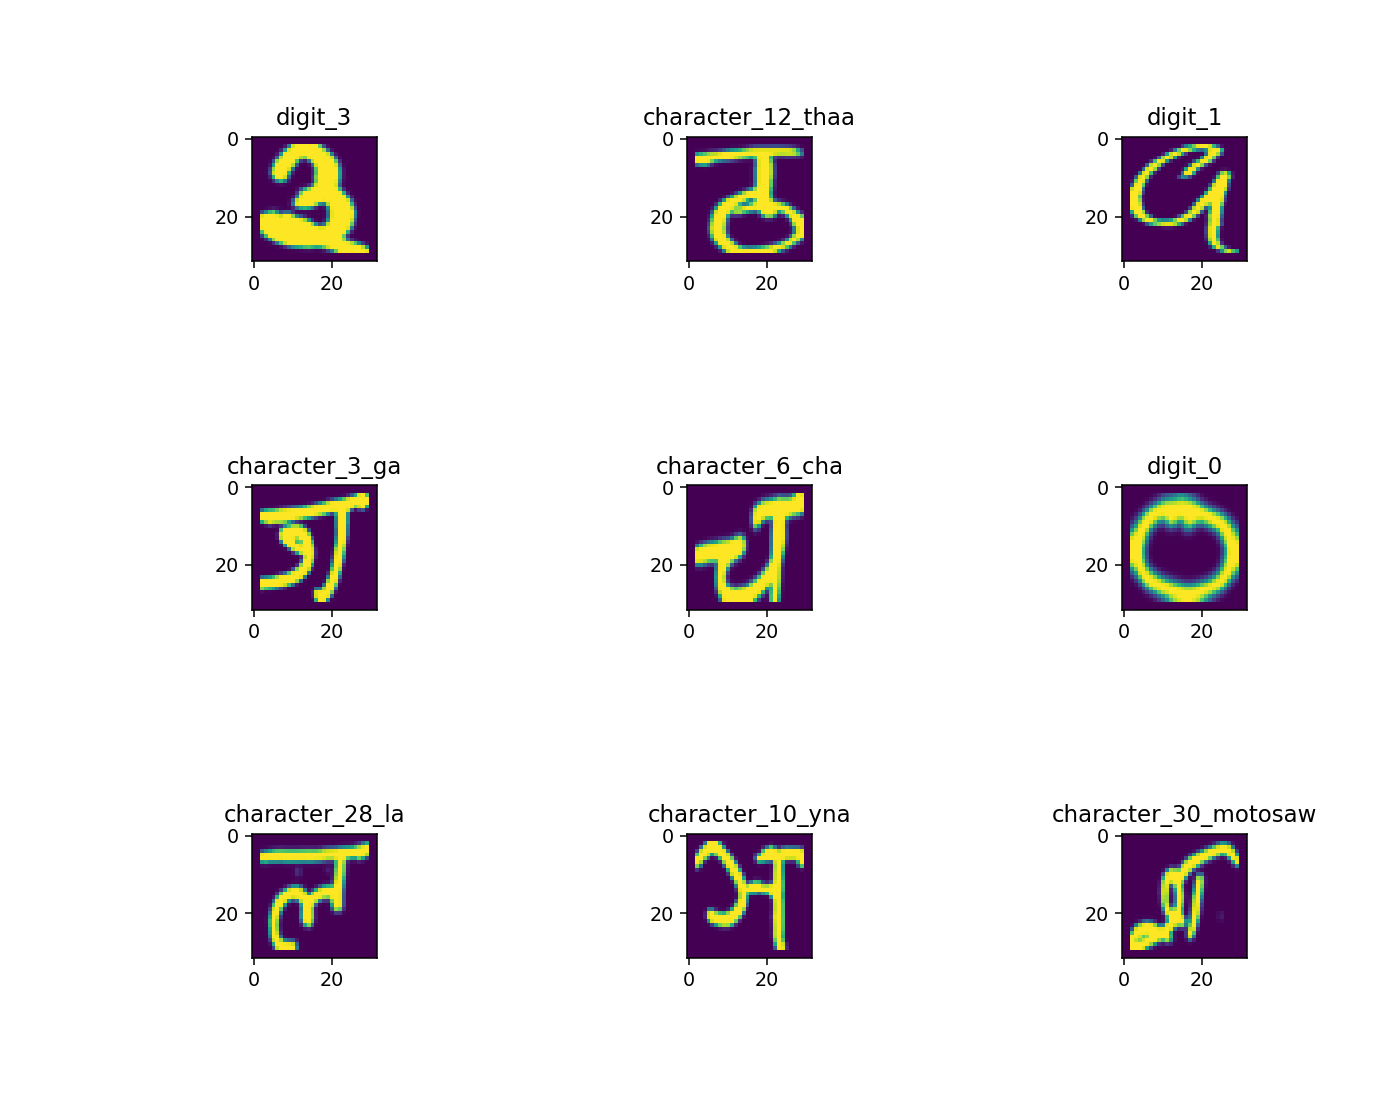

In [63]:
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 70000)
    plt.subplot(331+i)
    plt.imshow(trainData[r])
    plt.gca().set_title(NumToStr[trainLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)

In [17]:
# load numpy array from npy file
from numpy import load
# load array
testData = load('finalTestImgData.npy')
testLabels = load('finalTestClassName.npy')
# print the array
print(testData.shape)
print(testLabels.shape)
print(np.unique(testLabels))

(13800, 32, 32)
(13800,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


<IPython.core.display.Javascript object>


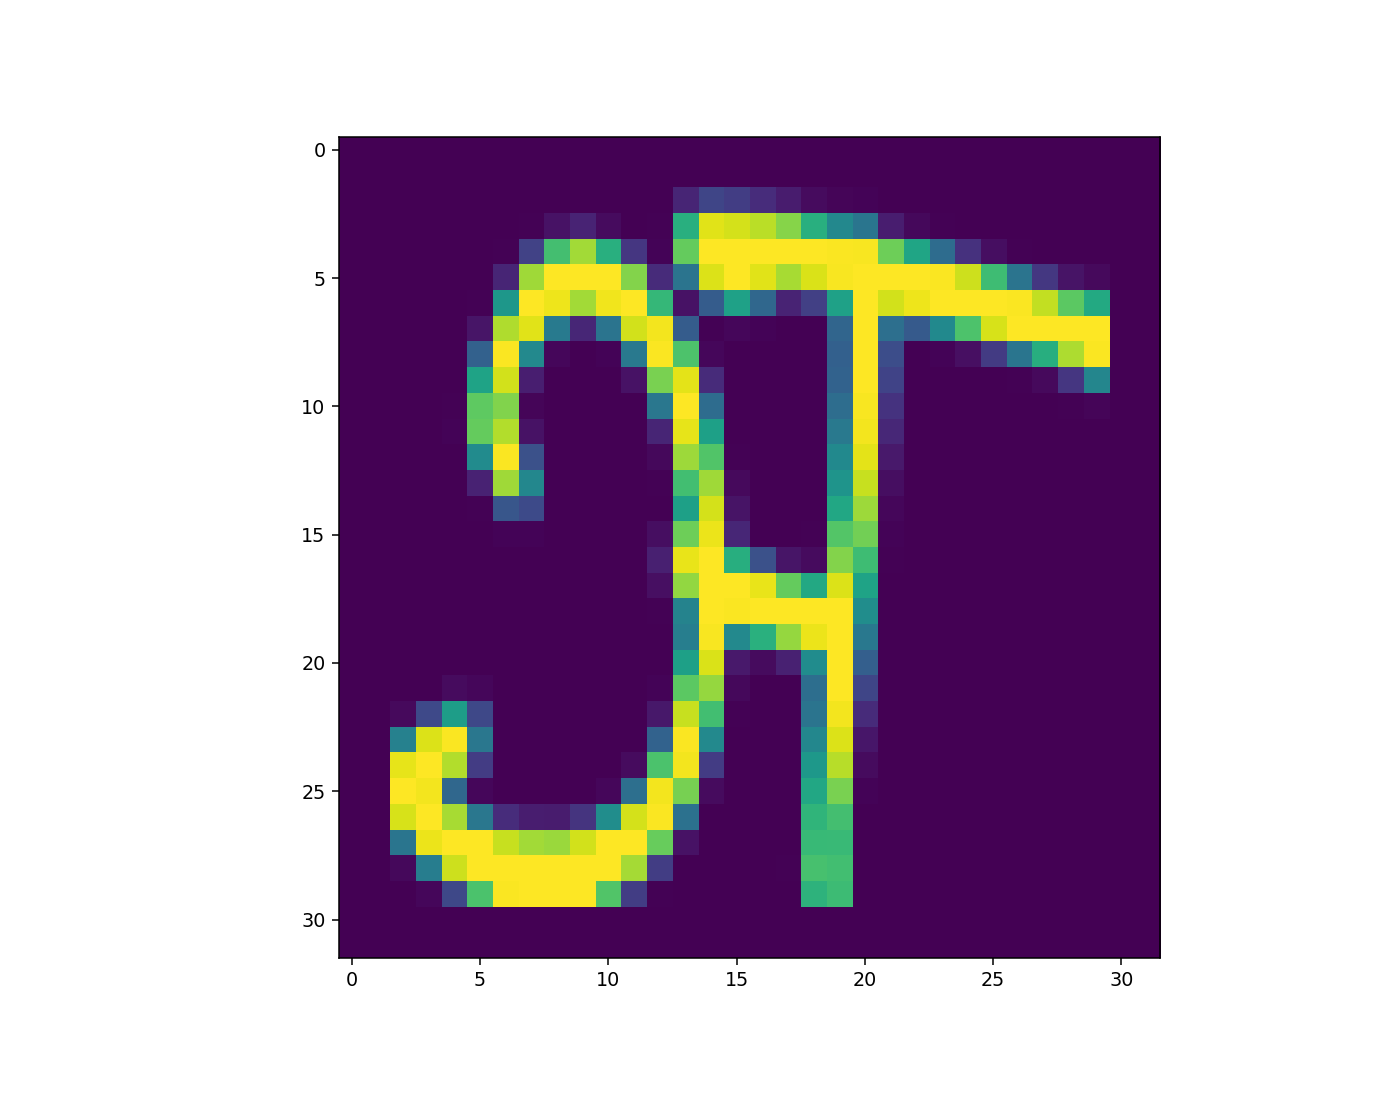

In [67]:
%matplotlib notebook       
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 13800)
    plt.subplot(331+i)
    plt.imshow(testData[r])
    plt.gca().set_title(NumToStr[testLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(32,32)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(46, activation=tf.nn.softmax)])

In [22]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.fit(data, labels , epochs=25)


Epoch 1/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0380 - accuracy: 0.9872
Epoch 2/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0362 - accuracy: 0.9878
Epoch 3/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0351 - accuracy: 0.9881
Epoch 4/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0351 - accuracy: 0.9887
Epoch 5/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0350 - accuracy: 0.9881
Epoch 6/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0341 - accuracy: 0.9889
Epoch 7/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0356 - accuracy: 0.9879
Epoch 8/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0337 - accuracy: 0.9890
Epoch 9/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.0308 - accuracy: 0.9900
Epoch 10/25
2444/2444 [==============================] - 3s 1ms/step - loss: 0.031

In [44]:
print(model.evaluate(trainData,trainLabels))

2444/2444 [==============================] - 2s 955us/step - loss: 0.0320 - accuracy: 0.9903
[0.03197894245386124, 0.9903069138526917]


In [45]:
print(model.evaluate(testData,testLabels))

432/432 [==============================] - 0s 1ms/step - loss: 0.7998 - accuracy: 0.9122
[0.7997556924819946, 0.9121739268302917]


In [147]:
randomImgPath='D:\SOFTWARES\Jupyter\\10045.png'

<class 'PIL.Image.Image'>
(32, 32)
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


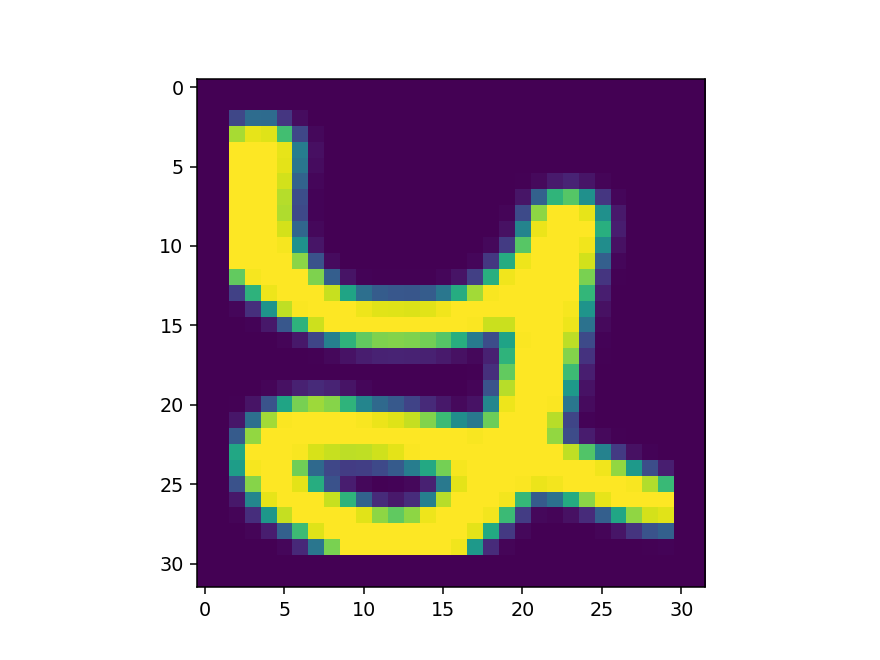

(78200, 32, 32)
(1, 32, 32)
digit_5


In [148]:
randomImg = Image.open(randomImgPath)

randomImg = randomImg.convert('L')


randomImg = randomImg.resize((32,32))
print(type(randomImg))

randomImg= np.array(randomImg)
randomImg= np.resize(randomImg,(32,32))
randomImg = randomImg.astype('float32')
randomImg /= 255  


print(randomImg.shape)

ip=np.resize(randomImg,(1,32,32))
# ip=testData[2:10]
print(type(ip))

plt.figure()

plt.subplot(111)
plt.imshow(ip[0])

print(trainData.shape)
print(ip.shape)
prediction = model.predict(ip)
print(NumToStr[np.argmax(prediction[0])])

